---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>


**8.** [**Model Development & Evaluation**](#Section8)<br>
  -**8.1.** [**EDA 2 - Assumption Check**](#Section15)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

<a name = Section1></a>
# **1. Introduction**

The objective of this analysis is to investigate the key economic and financial factors that have influenced U.S. home prices over the past 20 years. Housing prices are a vital economic indicator, reflecting both the health of the real estate market and broader economic conditions. Understanding these dynamics can help inform decision-making for investors, policymakers, and homeowners.

We utilize the S&P Case-Shiller U.S. National Home Price Index as a proxy for housing prices, and examine its relationship with various publicly available macroeconomic indicators sourced from the Federal Reserve Economic Data (FRED) platform.

<a name = Section2></a>
# **2. Problem Statement**

To build a data science model that explains how various macroeconomic and financial factors have impacted U.S. home prices over the last 20 years, using the S&P Case-Shiller Home Price Index as a proxy.



---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

| Dataset Name            | Source                                | Variable Name   | Description                                                                 |
|-------------------------|----------------------------------------|------------------|------------------------------------------------------------------------------|
| CSUSHPISA.csv           | FRED (Case-Shiller Index)             | HomePrice        | S&P Case-Shiller U.S. National Home Price Index (housing prices over time)  |
| MORTGAGE30US.csv        | FRED                                   | MortgageRate     | 30-Year Fixed Rate Mortgage Average in the U.S.                              |
| UNRATE.csv              | FRED                                   | Unemployment     | U.S. Unemployment Rate (monthly %)                                          |
| CPIAUCNS.csv            | FRED                                   | CPI              | Consumer Price Index for All Urban Consumers (inflation measure)            |
| MEHOINUSA672N.csv       | FRED                                   | Income           | Median Household Income in the U.S. (annual, in USD)                        |
| HOUST.csv               | FRED                                   | HousingStarts    | New Privately-Owned Housing Units Started (monthly units)                   |
| FEDFUNDS.csv            | FRED                                   | FedFunds         | Effective Federal Funds Rate (U.S. interest rate controlled by the Fed)     |


In [2]:
# Load CSVs with 'observation_date' as the datetime index
cs_index = pd.read_csv("CSUSHPISA.csv", parse_dates=["observation_date"], index_col="observation_date")
mortgage = pd.read_csv("MORTGAGE30US.csv", parse_dates=["observation_date"], index_col="observation_date")
unemployment = pd.read_csv("UNRATE.csv", parse_dates=["observation_date"], index_col="observation_date")
cpi = pd.read_csv("CPIAUCNS.csv", parse_dates=["observation_date"], index_col="observation_date")
income = pd.read_csv("MEHOINUSA672N.csv", parse_dates=["observation_date"], index_col="observation_date")
housing_starts = pd.read_csv("HOUST.csv", parse_dates=["observation_date"], index_col="observation_date")
fed_funds = pd.read_csv("FEDFUNDS.csv", parse_dates=["observation_date"], index_col="observation_date")

In [3]:
# Joining all DataFrames on their datetime index
data = cs_index.join([
    mortgage,
    unemployment,
    cpi,
    income,
    housing_starts,
    fed_funds
])

In [4]:
data.head()

,CSUSHPISA,MORTGAGE30US,UNRATE,CPIAUCNS,MEHOINUSA672N,HOUST,FEDFUNDS
observation_date,,,,,,,
1987-01-01,63.963,NaN,6.6,111.2,63060.0,1774.0,6.43
1987-02-01,64.423,NaN,6.6,111.6,NaN,1784.0,6.10
1987-03-01,64.734,NaN,6.6,112.1,NaN,1726.0,6.13
1987-04-01,65.130,NaN,6.3,112.7,NaN,1614.0,6.37
1987-05-01,65.564,10.47,6.3,113.1,NaN,1628.0,6.85


In [6]:
# Rename columns to clean names
data.columns = ['HomePrice', 'MortgageRate', 'Unemployment', 'CPI', 'Income', 'HousingStarts', 'FedFunds']
data.head()

,HomePrice,MortgageRate,Unemployment,CPI,Income,HousingStarts,FedFunds
observation_date,,,,,,,
1987-01-01,63.963,NaN,6.6,111.2,63060.0,1774.0,6.43
1987-02-01,64.423,NaN,6.6,111.6,NaN,1784.0,6.10
1987-03-01,64.734,NaN,6.6,112.1,NaN,1726.0,6.13
1987-04-01,65.130,NaN,6.3,112.7,NaN,1614.0,6.37
1987-05-01,65.564,10.47,6.3,113.1,NaN,1628.0,6.85


In [10]:
print(data.index.min())
print(data.index.max())


1987-01-01 00:00:00
2025-01-01 00:00:00


In [7]:
data_20yr = data.loc[(data.index >= '2005-04-01') & (data.index <= '2025-04-01')].copy()

In [8]:
data_20yr.head()

,HomePrice,MortgageRate,Unemployment,CPI,Income,HousingStarts,FedFunds
observation_date,,,,,,,
2005-04-01,167.503,NaN,5.2,194.6,NaN,2061.0,2.79
2005-05-01,169.352,NaN,5.1,194.4,NaN,2025.0,3.00
2005-06-01,171.192,NaN,5.0,194.5,NaN,2068.0,3.04
2005-07-01,172.861,NaN,5.0,195.4,NaN,2054.0,3.26
2005-08-01,174.443,NaN,4.9,196.4,NaN,2095.0,3.50


<a name = Section41></a>
### **4.1 Data Information**


In [18]:
data_20yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2005-04-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePrice      238 non-null    float64
 1   Unemployment   238 non-null    float64
 2   CPI            238 non-null    float64
 3   HousingStarts  238 non-null    float64
 4   FedFunds       238 non-null    float64
dtypes: float64(5)
memory usage: 11.2 KB


In [9]:
print(data_20yr.index.min())
print(data_20yr.index.max())


2005-04-01 00:00:00
2025-01-01 00:00:00


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [11]:
data_20yr.isna().sum()

HomePrice          0
MortgageRate     206
Unemployment       0
CPI                0
Income           220
HousingStarts      0
FedFunds           0
dtype: int64

In [13]:
data_20yr.shape

(238, 7)

In [14]:
data_20yr = data_20yr.drop(columns=['MortgageRate', 'Income'])


In [16]:
data_20yr.shape

(238, 5)

<a name = Section42></a>
### **4.2 Data Description**


In [19]:
data_20yr.describe()

,HomePrice,Unemployment,CPI,HousingStarts,FedFunds
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,198.782403,5.817227,243.255660,1187.453782,1.687395
std,55.798382,2.150870,32.314038,399.149354,1.957783
min,136.526000,3.400000,194.400000,478.000000,0.050000
25%,158.554000,4.100000,218.211500,915.500000,0.120000
50%,181.256000,5.000000,237.384500,1204.000000,0.400000
75%,215.696750,7.450000,257.311500,1418.750000,3.030000
max,329.441000,14.800000,317.671000,2273.000000,5.330000


**Key Insights**
HomePrice :Median is 181.26, suggesting slightly right-skewed distribution. Large range (136–329) implies high price variability across time.
Unemployment: Wide range (3.4% to 14.8%) indicates major economic swings — possibly reflecting 2008 and COVID-19 recessions.
CPI	:Fairly steady inflation, with values increasing over time. May be highly correlated with time.
HousingStarts :Large variation — from a low of 478 to a high of 2273 — might be tied to market booms and busts.
FedFunds :Very low rates dominate (as seen by median = 0.4%). Indicates post-2008 and post-COVID rate policies.

**Additional Observations**:
Unemployment has a max of 14.8% — this likely corresponds to the COVID-19 spike in 2020.

FedFunds rate minimum is 0.05 — near-zero interest rate policy periods (2008–2015, 2020–2022).

CPI and HomePrice both show a rising trend, so could have a strong positive correlation over time.

HousingStarts variability suggests it's influenced by macroeconomic shifts — possible lagged effects on HomePrice.

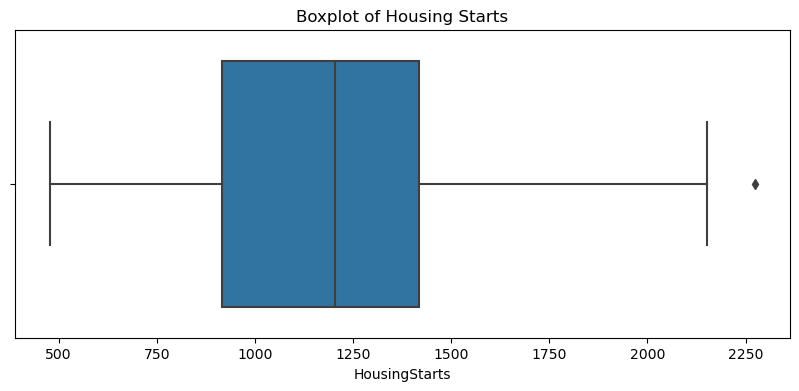

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_20yr['HousingStarts'])
plt.title("Boxplot of Housing Starts")
plt.show()

In [21]:
data_20yr = data_20yr[data_20yr['HousingStarts'] < 2270]


<a name = Section53></a>
### **5.3 Data Post-Profiling**


In [22]:
data_20yr.shape

(237, 5)

In [25]:
data_20yr['year'] = data_20yr.index.year


C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\2578971860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['year'] = data_20yr.index.year


In [26]:
data_20yr.head()

,HomePrice,Unemployment,CPI,HousingStarts,FedFunds,year
observation_date,,,,,,
2005-04-01,167.503,5.2,194.6,2061.0,2.79,2005
2005-05-01,169.352,5.1,194.4,2025.0,3.00,2005
2005-06-01,171.192,5.0,194.5,2068.0,3.04,2005
2005-07-01,172.861,5.0,195.4,2054.0,3.26,2005
2005-08-01,174.443,4.9,196.4,2095.0,3.50,2005


In [27]:
data_20yr[['HomePrice', 'year']].corr()


,HomePrice,year
HomePrice,1.000000,0.806849
year,0.806849,1.000000


In [30]:
data_20yr['TimeIndex'] = np.arange(len(data_20yr))


C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\636237029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['TimeIndex'] = np.arange(len(data_20yr))


In [31]:
data_20yr[['HomePrice', 'TimeIndex']].corr()

,HomePrice,TimeIndex
HomePrice,1.000000,0.809141
TimeIndex,0.809141,1.000000


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

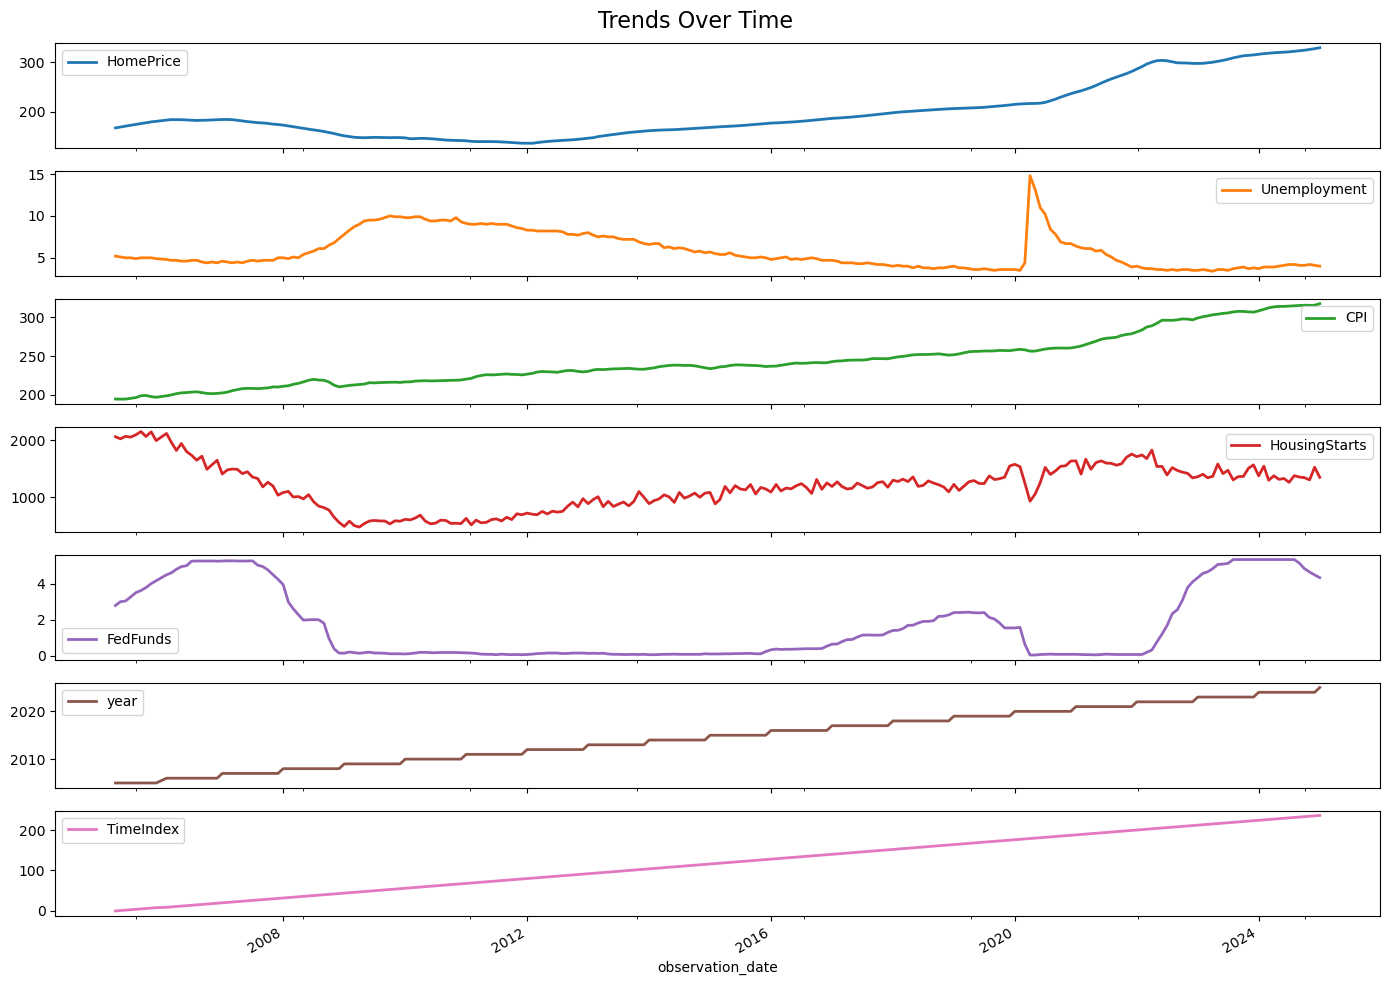

In [32]:
import matplotlib.pyplot as plt

data_20yr.plot(subplots=True, figsize=(14, 10), linewidth=2)
plt.suptitle("Trends Over Time", fontsize=16)
plt.tight_layout()
plt.show()

**1. HomePrice Trend**
Steady growth from 2012 to 2022 with a noticeable acceleration post-2020.

There's a dip in 2008–2011, likely reflecting the housing market crash.

Overall, the trend is non-linear with sharp shifts during key economic periods.

**2. Unemployment**
Rises sharply in 2008–2009 (recession) and again around 2020 (COVID spike).

Then falls quickly post-2021, back to pre-pandemic levels.

**3. CPI (Consumer Price Index)**
Smooth upward trend over time (inflation).

This steady growth can drive home price appreciation over time.

Insight: Might not be a good short-term predictor due to linearity, but useful for long-term inflation adjustment.

**4. HousingStarts**
Sharp drop post-2006, bottoming around 2011, then slow recovery.

Slight volatility after 2020.

**5. FedFunds Rate**
High pre-2008, then drops close to 0 until ~2016.

Begins rising again post-2016, jumps significantly around 2022.

Insight: Strong inverse relation with housing prices. Sudden hikes reduce affordability → can cool down home prices.

In [34]:
# Reflect delayed impact (e.g., interest rates today affect home prices months later)

data_20yr['FedFunds_lag3'] = data_20yr['FedFunds'].shift(3)   # 3 months ago
data_20yr['Unemployment_lag6'] = data_20yr['Unemployment'].shift(6)

C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\714769397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['FedFunds_lag3'] = data_20yr['FedFunds'].shift(3)   # 3 months ago
C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\714769397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['Unemployment_lag6'] = data_20yr['Unemployment'].shift(6)


In [37]:
#Smooth volatility and reflect economic trends
data_20yr['CPI_roll3'] = data_20yr['CPI'].rolling(3).mean()
data_20yr['Unemployment_roll6'] = data_20yr['Unemployment'].rolling(6).mean()
# Reduces noise, shows trends better

C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\954097377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['CPI_roll3'] = data_20yr['CPI'].rolling(3).mean()
C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\954097377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['Unemployment_roll6'] = data_20yr['Unemployment'].rolling(6).mean()


In [39]:
#Reflect combinations of variables that may influence home prices

data_20yr['CPI_FedFunds'] = data_20yr['CPI'] * data_20yr['FedFunds']
#inflation + high interest rates = big impact on housing

C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\2725034921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['CPI_FedFunds'] = data_20yr['CPI'] * data_20yr['FedFunds']


In [41]:
#Show rate of change
data_20yr['CPI_pct_change'] = data_20yr['CPI'].pct_change()
data_20yr['HomePrice_pct_change'] = data_20yr['HomePrice'].pct_change()

C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\4047896384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['CPI_pct_change'] = data_20yr['CPI'].pct_change()
C:\Users\saraf\AppData\Local\Temp\ipykernel_21968\4047896384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20yr['HomePrice_pct_change'] = data_20yr['HomePrice'].pct_change()


In [42]:
data_20yr.head()

,HomePrice,Unemployment,CPI,HousingStarts,FedFunds,year,TimeIndex,FedFunds_lag3,Unemployment_lag6,CPI_roll3,Unemployment_roll6,CPI_FedFunds,CPI_pct_change,HomePrice_pct_change
observation_date,,,,,,,,,,,,,,
2005-04-01,167.503,5.2,194.6,2061.0,2.79,2005,0,NaN,NaN,NaN,NaN,542.934,NaN,NaN
2005-05-01,169.352,5.1,194.4,2025.0,3.00,2005,1,NaN,NaN,NaN,NaN,583.200,-0.001028,0.011039
2005-06-01,171.192,5.0,194.5,2068.0,3.04,2005,2,NaN,NaN,194.500000,NaN,591.280,0.000514,0.010865
2005-07-01,172.861,5.0,195.4,2054.0,3.26,2005,3,2.79,NaN,194.766667,NaN,637.004,0.004627,0.009749
2005-08-01,174.443,4.9,196.4,2095.0,3.50,2005,4,3.00,NaN,195.433333,NaN,687.400,0.005118,0.009152


In [43]:
data_20yr.isna().sum()

HomePrice               0
Unemployment            0
CPI                     0
HousingStarts           0
FedFunds                0
year                    0
TimeIndex               0
FedFunds_lag3           3
Unemployment_lag6       6
CPI_roll3               2
Unemployment_roll6      5
CPI_FedFunds            0
CPI_pct_change          1
HomePrice_pct_change    1
dtype: int64

In [44]:
data_20yr = data_20yr.dropna()

In [45]:
data_20yr.isna().sum()

HomePrice               0
Unemployment            0
CPI                     0
HousingStarts           0
FedFunds                0
year                    0
TimeIndex               0
FedFunds_lag3           0
Unemployment_lag6       0
CPI_roll3               0
Unemployment_roll6      0
CPI_FedFunds            0
CPI_pct_change          0
HomePrice_pct_change    0
dtype: int64

In [46]:
y = data_20yr['HomePrice']

# Feature columns (include your engineered ones!)
X = data_20yr.drop('HomePrice', axis = 1)

In [47]:
y

observation_date
2005-10-01    178.028
2005-11-01    179.682
2005-12-01    180.911
2006-02-01    183.288
2006-03-01    184.365
               ...   
2024-09-01    323.311
2024-10-01    324.491
2024-11-01    326.013
2024-12-01    327.582
2025-01-01    329.441
Name: HomePrice, Length: 231, dtype: float64

In [48]:
X

,Unemployment,CPI,HousingStarts,FedFunds,year,TimeIndex,FedFunds_lag3,Unemployment_lag6,CPI_roll3,Unemployment_roll6,CPI_FedFunds,CPI_pct_change,HomePrice_pct_change
observation_date,,,,,,,,,,,,,
2005-10-01,5.0,199.200,2065.0,3.78,2005,6,3.26,5.2,198.133333,5.000000,752.97600,0.002012,0.009006
2005-11-01,5.0,197.600,2147.0,4.00,2005,7,3.50,5.1,198.533333,4.983333,790.40000,-0.008032,0.009291
2005-12-01,4.9,196.800,1994.0,4.16,2005,8,3.62,5.0,197.866667,4.966667,818.68800,-0.004049,0.006840
2006-02-01,4.8,198.700,2119.0,4.49,2006,9,3.78,5.0,197.700000,4.933333,892.16300,0.009654,0.013139
2006-03-01,4.7,199.800,1969.0,4.59,2006,10,4.00,4.9,198.433333,4.900000,917.08200,0.005536,0.005876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,4.1,315.301,1355.0,5.13,2024,232,5.33,3.9,314.879000,4.083333,1617.49413,0.001604,0.003140
2024-10-01,4.1,315.664,1344.0,4.83,2024,233,5.33,3.9,315.253667,4.116667,1524.65712,0.001151,0.003650
2024-11-01,4.2,315.493,1305.0,4.64,2024,234,5.33,4.0,315.486000,4.150000,1463.88752,-0.000542,0.004690


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [50]:
X_train.head()

,Unemployment,CPI,HousingStarts,FedFunds,year,TimeIndex,FedFunds_lag3,Unemployment_lag6,CPI_roll3,Unemployment_roll6,CPI_FedFunds,CPI_pct_change,HomePrice_pct_change
observation_date,,,,,,,,,,,,,
2022-01-01,4.0,281.148,1712.0,0.08,2022,200,0.08,5.4,279.299333,4.400000,22.49184,0.008415,0.016893
2010-07-01,9.4,218.011,546.0,0.18,2010,62,0.20,9.8,218.051333,9.666667,39.24198,0.000211,-0.005023
2024-11-01,4.2,315.493,1305.0,4.64,2024,234,5.33,4.0,315.486000,4.150000,1463.88752,-0.000542,0.004690
2022-07-01,3.5,296.276,1392.0,1.68,2022,206,0.33,4.0,294.961000,3.650000,497.74368,-0.000118,-0.003042
2021-05-01,5.8,269.195,1607.0,0.06,2021,192,0.08,6.7,267.042000,6.216667,16.15170,0.008017,0.016770


In [51]:
Y_train.head()

observation_date
2022-01-01    286.350
2010-07-01    144.986
2024-11-01    326.013
2022-07-01    303.111
2021-05-01    253.256
Name: HomePrice, dtype: float64

In [52]:
X_train.shape

(184, 13)

In [53]:
X_test.shape

(47, 13)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train_cont_scaled = pd.DataFrame(scaler.transform(X_train),
            index = X_train.index,
            columns = X_train.columns + '_S' )

In [56]:
X_train_cont_scaled

,Unemployment_S,CPI_S,HousingStarts_S,FedFunds_S,year_S,TimeIndex_S,FedFunds_lag3_S,Unemployment_lag6_S,CPI_roll3_S,Unemployment_roll6_S,CPI_FedFunds_S,CPI_pct_change_S,HomePrice_pct_change_S
observation_date,,,,,,,,,,,,,
2022-01-01,-0.820910,1.133984,1.445807,-0.799283,1.234044,1.152921,-0.788786,-0.182934,1.101733,-0.680449,-0.760803,1.522857,2.168505
2010-07-01,1.726424,-0.863477,-1.713007,-0.748498,-0.913134,-0.910004,-0.726990,1.911885,-0.851012,1.922962,-0.728640,-0.486632,-1.211753
2024-11-01,-0.726565,2.220555,0.343202,1.516510,1.591907,1.661178,1.914759,-0.849468,2.255458,-0.804029,2.006858,-0.671024,0.286438
2022-07-01,-1.056775,1.612588,0.578894,0.013276,1.234044,1.242614,-0.660045,-0.849468,1.601067,-1.051188,0.151741,-0.567262,-0.906218
2021-05-01,0.028201,0.755828,1.161351,-0.809440,1.055113,1.033331,-0.788786,0.435989,0.710938,0.217563,-0.772977,1.425495,2.149474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,-0.726565,0.043174,0.256511,-0.250806,0.339386,0.405484,-0.232628,-0.659030,0.062924,-0.738120,-0.254573,-0.532370,0.476799
2015-09-01,-0.349182,-0.232827,0.123765,-0.768812,-0.018477,0.016817,-0.763038,-0.182934,-0.205272,-0.252040,-0.740026,-0.919662,0.358611
2021-08-01,-0.302009,0.894145,1.128842,-0.794205,1.055113,1.078178,-0.799085,0.197942,0.893093,-0.021358,-0.756714,-0.032275,2.033052


In [57]:
X_test_cont_scaled = pd.DataFrame(scaler.transform(X_test),
            index = X_test.index,
            columns = X_test.columns + '_S' )

In [60]:
X_test_cont_scaled.head()

,Unemployment_S,CPI_S,HousingStarts_S,FedFunds_S,year_S,TimeIndex_S,FedFunds_lag3_S,Unemployment_lag6_S,CPI_roll3_S,Unemployment_roll6_S,CPI_FedFunds_S,CPI_pct_change_S,HomePrice_pct_change_S
observation_date,,,,,,,,,,,,,
2017-07-01,-0.679392,-0.016398,0.075001,-0.255884,0.339386,0.345690,-0.366518,-0.516201,0.002591,-0.680449,-0.263467,-0.707328,0.336274
2013-05-01,0.830140,-0.391011,-0.672711,-0.784048,-0.376340,-0.401747,-0.752738,0.912085,-0.382391,0.950802,-0.754789,-0.102210,0.918924
2018-11-01,-0.915256,0.213033,0.007273,0.277358,0.518318,0.584869,0.153593,-0.944687,0.245834,-0.968802,0.260688,-1.358765,-0.004535
2013-02-01,0.924486,-0.415656,-0.586020,-0.763734,-0.376340,-0.446594,-0.747589,1.102523,-0.448303,1.008473,-0.737122,1.467854,0.568340
2015-07-01,-0.254836,-0.210396,-0.087545,-0.773891,-0.018477,-0.013080,-0.768187,-0.040106,-0.203338,-0.186131,-0.744418,-0.521905,0.170166


---
<a name = Section15></a>
# <span style="font-family: Arial; color:red">**. EDA 2: Assumption Check**</span>
---


<a name = Section15></a>
# <span style="font-family: Arial; color:red"> Target Variable should be normally distributed. </span>



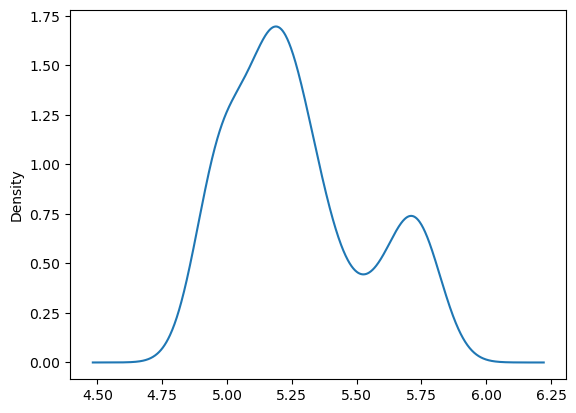

In [59]:
import numpy as np
np.log(Y_train).plot.kde()
plt.show()

In [61]:
TV_train = np.log(Y_train)

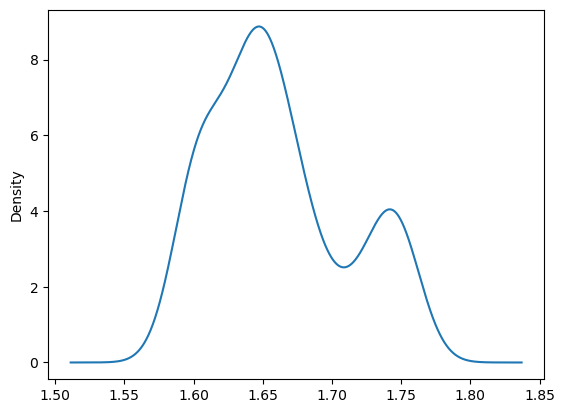

In [62]:
np.log(TV_train).plot.kde()
plt.show()

Target variable was analyzed for linearity and distribution — transformation didn’t help much due to inherent non-linear patterns.

<a name = Section15></a>
# <span style="font-family: Arial; color:red"> No multicollinearity.  </span>

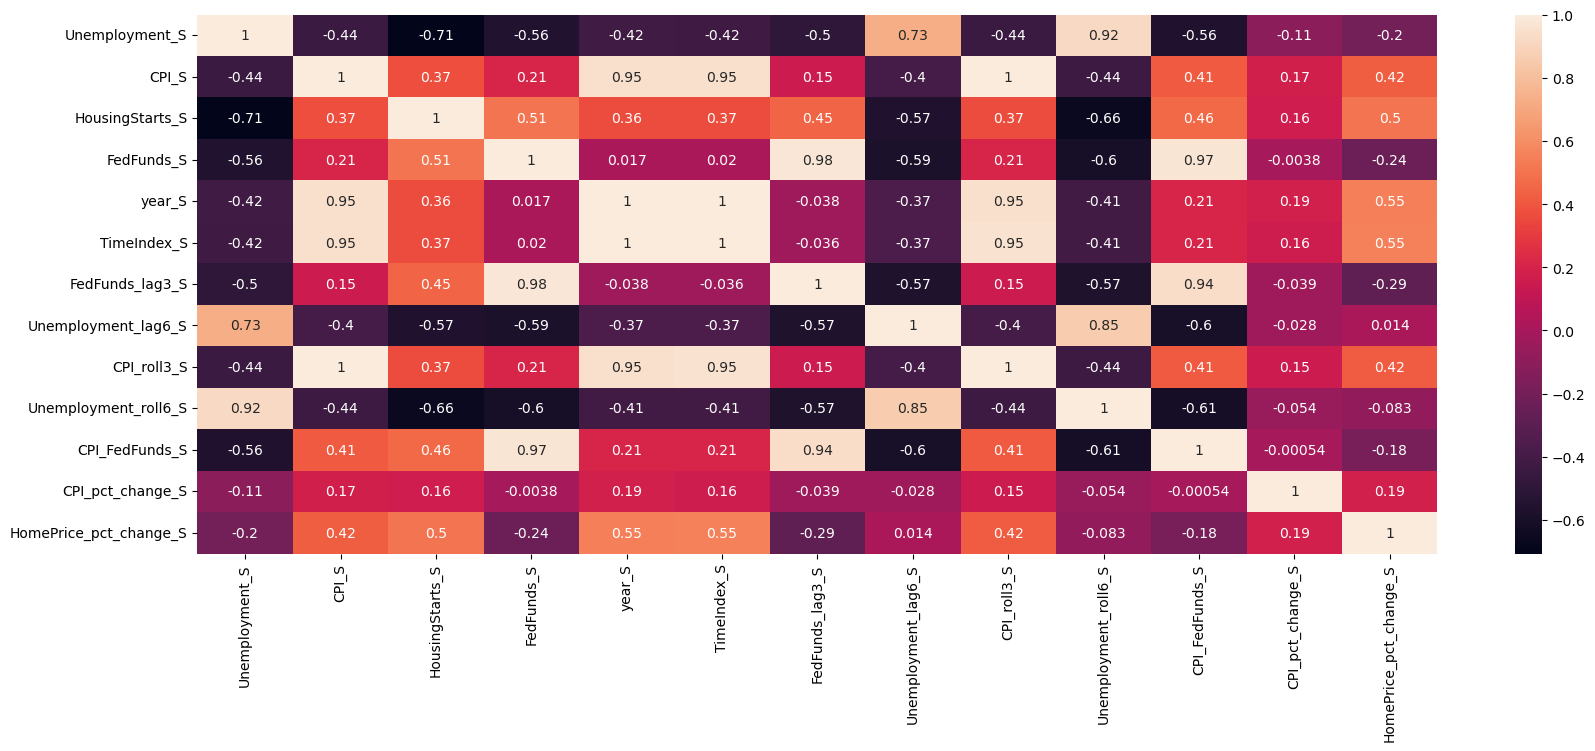

In [64]:
paper = plt.figure(figsize = [20,7])
sns.heatmap(X_train_cont_scaled.corr(), annot = True)
plt.show()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_cont_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_cont_scaled.values, i) for i in range(X_train_cont_scaled.shape[1])]
print(vif_data)

                   Feature           VIF
0           Unemployment_S      9.039077
1                    CPI_S  16258.211552
2          HousingStarts_S      8.038931
3               FedFunds_S    258.748859
4                   year_S    624.038954
5              TimeIndex_S    718.291930
6          FedFunds_lag3_S     25.973583
7      Unemployment_lag6_S      4.594040
8              CPI_roll3_S  16914.362605
9     Unemployment_roll6_S     13.606023
10          CPI_FedFunds_S    254.095908
11        CPI_pct_change_S     11.490066
12  HomePrice_pct_change_S      3.766220


VIF > 10 suggests high multicollinearity, which can affect model stability and interpretability.

In [67]:
X_train_cont_scaled.drop(['CPI_S', 'CPI_roll3_S', 'TimeIndex_S',
    'year_S', 'FedFunds_S', 'CPI_FedFunds_S'], 
                         axis=1, inplace=True)

In [68]:
X_test_cont_scaled.drop(['CPI_S', 'CPI_roll3_S', 'TimeIndex_S',
    'year_S', 'FedFunds_S', 'CPI_FedFunds_S'], 
                         axis=1, inplace=True)

In [69]:
X_train_cont_scaled.head()

,Unemployment_S,HousingStarts_S,FedFunds_lag3_S,Unemployment_lag6_S,Unemployment_roll6_S,CPI_pct_change_S,HomePrice_pct_change_S
observation_date,,,,,,,
2022-01-01,-0.820910,1.445807,-0.788786,-0.182934,-0.680449,1.522857,2.168505
2010-07-01,1.726424,-1.713007,-0.726990,1.911885,1.922962,-0.486632,-1.211753
2024-11-01,-0.726565,0.343202,1.914759,-0.849468,-0.804029,-0.671024,0.286438
2022-07-01,-1.056775,0.578894,-0.660045,-0.849468,-1.051188,-0.567262,-0.906218
2021-05-01,0.028201,1.161351,-0.788786,0.435989,0.217563,1.425495,2.149474


In [70]:
X_test_cont_scaled.head()

,Unemployment_S,HousingStarts_S,FedFunds_lag3_S,Unemployment_lag6_S,Unemployment_roll6_S,CPI_pct_change_S,HomePrice_pct_change_S
observation_date,,,,,,,
2017-07-01,-0.679392,0.075001,-0.366518,-0.516201,-0.680449,-0.707328,0.336274
2013-05-01,0.830140,-0.672711,-0.752738,0.912085,0.950802,-0.102210,0.918924
2018-11-01,-0.915256,0.007273,0.153593,-0.944687,-0.968802,-1.358765,-0.004535
2013-02-01,0.924486,-0.586020,-0.747589,1.102523,1.008473,1.467854,0.568340
2015-07-01,-0.254836,-0.087545,-0.768187,-0.040106,-0.186131,-0.521905,0.170166


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_cont_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_cont_scaled.values, i) for i in range(X_train_cont_scaled.shape[1])]
print(vif_data)

                  Feature        VIF
0          Unemployment_S   8.040198
1         HousingStarts_S   3.853895
2         FedFunds_lag3_S   2.352381
3     Unemployment_lag6_S   4.129177
4    Unemployment_roll6_S  12.203210
5        CPI_pct_change_S   1.056677
6  HomePrice_pct_change_S   2.504263


In [72]:
X_train_cont_scaled.drop('Unemployment_roll6_S', axis = 1, inplace = True)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_cont_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_cont_scaled.values, i) for i in range(X_train_cont_scaled.shape[1])]
print(vif_data)

                  Feature       VIF
0          Unemployment_S  2.981374
1         HousingStarts_S  3.852264
2         FedFunds_lag3_S  2.343305
3     Unemployment_lag6_S  2.547000
4        CPI_pct_change_S  1.050409
5  HomePrice_pct_change_S  2.487917


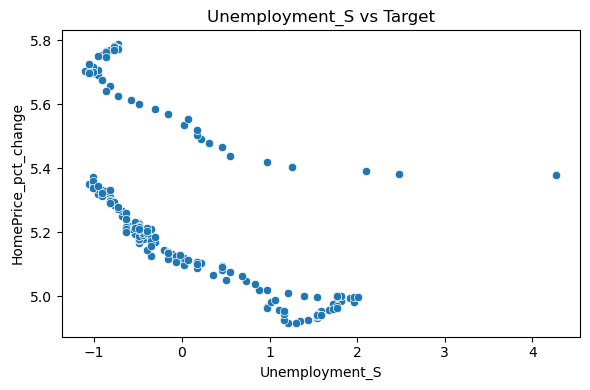

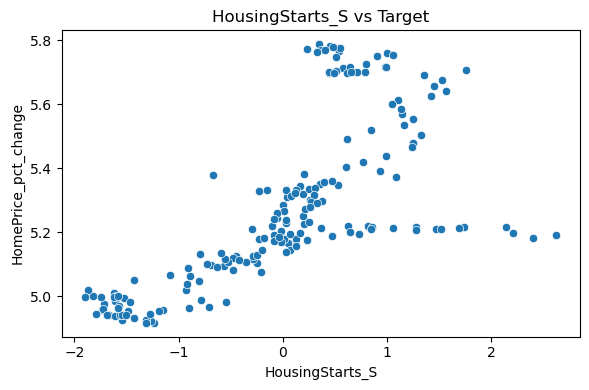

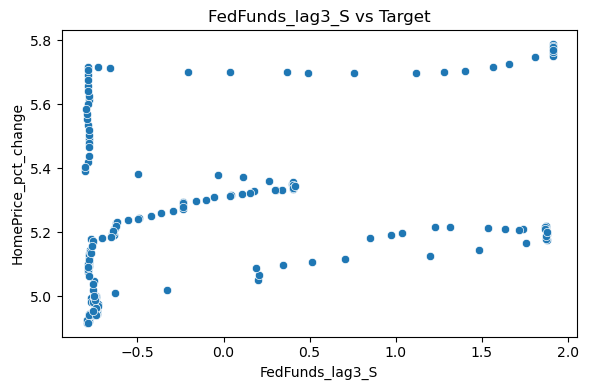

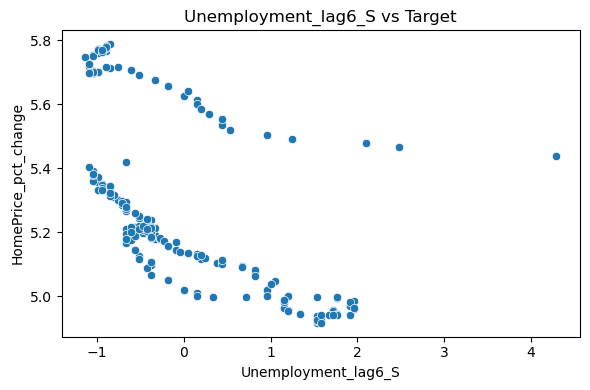

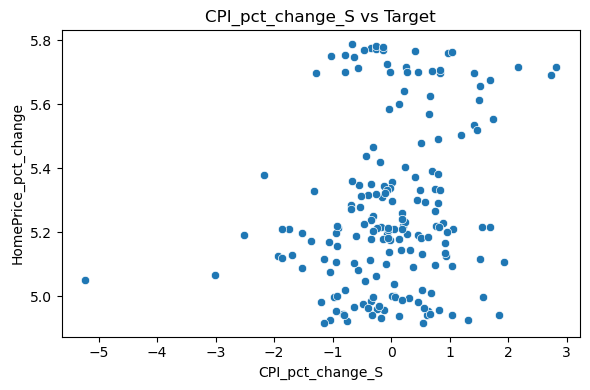

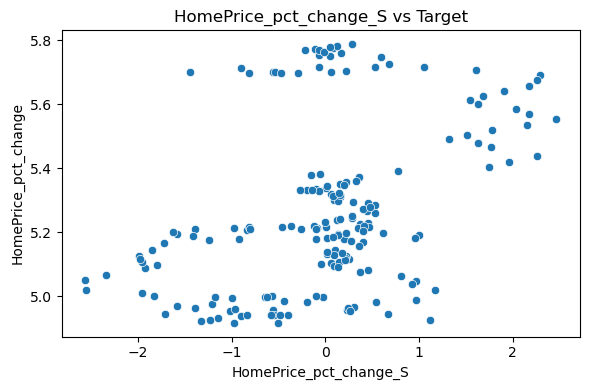

In [74]:
for col in X_train_cont_scaled.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train_cont_scaled[col], y=TV_train)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('HomePrice_pct_change')  # or whatever your target variable is
    plt.tight_layout()
    plt.show()

C:\Users\saraf\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


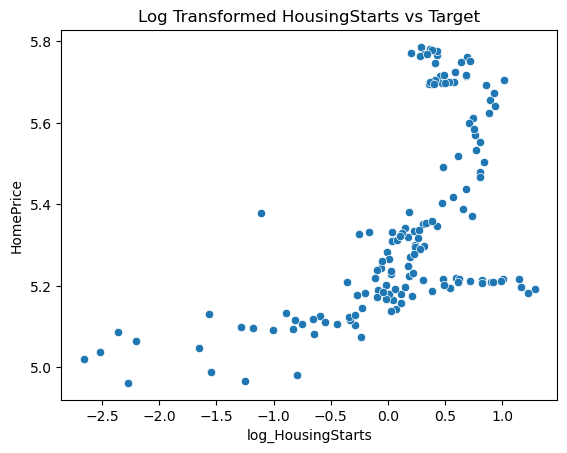

In [75]:
X_train_cont_scaled['log_HousingStarts'] = np.log(X_train_cont_scaled['HousingStarts_S'] + 1)

sns.scatterplot(x=X_train_cont_scaled['log_HousingStarts'], y=TV_train)
plt.title("Log Transformed HousingStarts vs Target")
plt.show()

In [76]:
X_train_cont_scaled.drop('log_HousingStarts', axis = 1, inplace = True)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---


In [77]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Model initialization
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

# Fit model
model.fit(X_train_cont_scaled, TV_train)

# Predict on train set (or use test set if you’ve split)
preds = model.predict(X_train_cont_scaled)

# Evaluate
print("MAE:", mean_absolute_error(TV_train, preds))
print("R²:", r2_score(TV_train, preds))


MAE: 0.01569580864181604
R²: 0.9915912514477421


A tree-based model (XGBoost Regressor) was selected due to:

Non-linear relationships in the data

Robustness to multicollinearity

Strong performance without strict assumptions

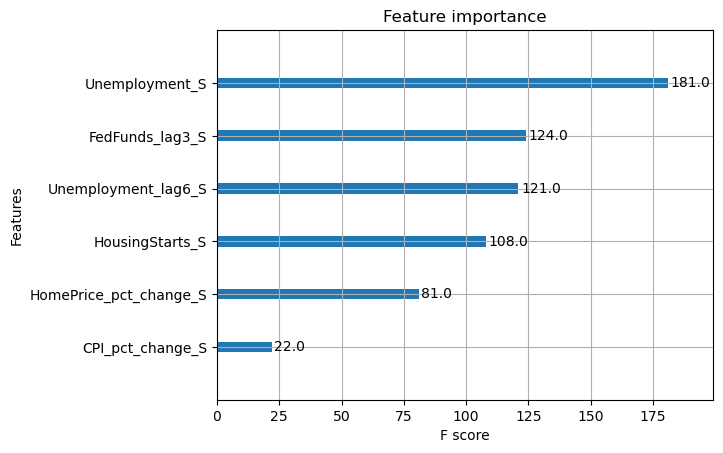

In [78]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()


In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, TV_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [0.99630024 0.9960599  0.97455631 0.99748548 0.99619375]
Mean R²: 0.9921191330061007


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train R²:", r2_score(y_train, pred_train))
print("Test R²:", r2_score(y_test, pred_test))


Train R²: 0.9994944432182872
Test R²: 0.9971487454921412


Not overfitting
Generalizing well to unseen data

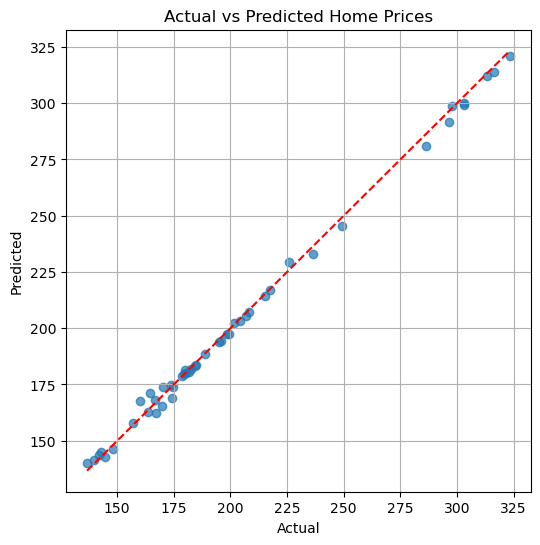

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Home Prices")
plt.grid(True)
plt.show()


<a name = Section8></a>

---
# **9. Conclusion**
---


Key Insights
CPI and Fed Funds Rate are influential in explaining price dynamics, especially when combined as interaction terms.

Lagged economic indicators (e.g., unemployment from 6 months ago) helped capture delayed effects on housing.

Housing Starts has an inverse relationship with prices — when more homes are being built, price pressure may ease.

Unemployment has a lagged negative effect on home prices — economic stress takes time to impact housing markets.

The overall U.S. housing price trend over 20 years shows strong growth with temporary dips during macroeconomic shocks (e.g., 2008 crash, COVID).

Our model not only explains home price movements well but also demonstrates the value of integrating lagged, rolled, and combined features to reflect real-world economic impact timing.